### Our basic motivation here is to classify the videos based on their Category/Title based on the features we are provided with. I am going to proceed with the US Region Dataset and once the model is built I can replicate the same on the other country datasets.

## Initial Assumptions Made:

#### Our dataset contains 570 Null values. We assume that the data is missing completely at random (i.e., the events that lead to any particular data-item being missing are independent both of observable variables and of unobservable parameters of interest, and occur entirely at random. When data are MCAR, the analysis performed on the data is unbiased; however, data are rarely MCAR).

In [1]:
#Importing all necessary packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import read_excel, merge
from IPython.core.display import HTML
css_file = 'style.css'
from numpy import nan
import sklearn
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import simplejson as json
from pandas.io.json import json_normalize

In [2]:
# Reading the data
file_name = 'D:\\Springboard_Capstone2\\CapstoneDataset\\NewData\\YouTubeDataSet.csv'
df=pd.read_csv(file_name, encoding='utf-8')
df.head()

,video_id,trending_date,title_description,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22.0,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22.0,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22.0,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062.0,7250.0,217.0,456.0,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22.0,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430.0,115426.0,1110.0,6541.0,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


### Checking the Dataset Length: 

In [3]:
df.shape

(40845, 17)

### Checking if there are any Null Values

In [4]:
# Checking the count of Null Values in the dataset
print(df.isnull().sum())

video_id                    0
trending_date             378
title_description         466
channel_title             466
category_id               466
publish_time              466
tags                      466
views                     466
likes                     466
dislikes                  466
comment_count             466
thumbnail_link            466
comments_disabled         466
ratings_disabled          466
video_error_or_removed    466
description               466
title                     554
dtype: int64


### Q. Why I Decided to drop the Null Values?

##### Answer: In my opinion, if I impute the Null Values or perform Forward Filling/Backward Filling that might give rise to erroneous data. It is a much better approach to drop Null Values. This apart dropping 400 rows from a 40000 is equivalent to just 1 % of the data. In my opinion, dropping the rows is the best approach.  

In [5]:
# Dropping Null values
df = df.dropna()

### Checking the size of the Dataset after dropping the rows

In [6]:
df.shape

(40291, 17)

### Checking for Outliers in the numerical variables of our Dataset

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40291.000000,4.029100e+04,4.029100e+04,4.029100e+04,4.029100e+04
mean,19.948524,2.370959e+06,7.467720e+04,3.512181e+03,8.293502e+03
std,7.601255,7.435902e+06,2.298574e+05,2.319995e+04,3.435258e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.465700e+05,5.613000e+03,2.040000e+02,6.220000e+02
50%,24.000000,6.875460e+05,1.832400e+04,6.350000e+02,1.869000e+03
75%,25.000000,1.829606e+06,5.563250e+04,1.944000e+03,5.776500e+03
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


#### Numerical variables such as views, likes, dislikes, comment_count have some values that are more that 3 standard deviations away from the mean. In order to validate this we need to check if the variables are normally distributed.  

## Doing a Normality Test on the Numerical Columns

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


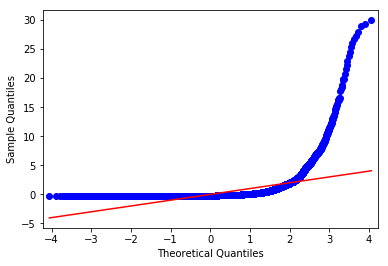

In [8]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['views'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The views dimension is not normally distributed

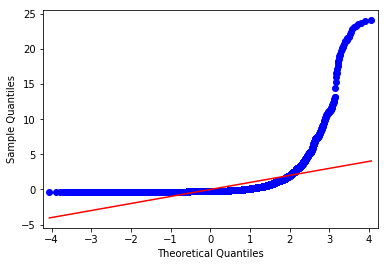

In [9]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['likes'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The likes dimension is not normally distributed

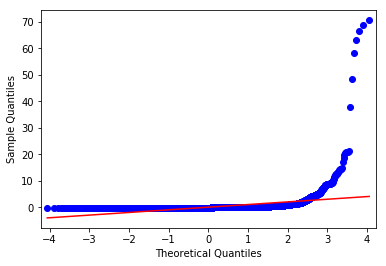

In [10]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['dislikes'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The dislikes dimension is not normally distributed

##### None of the numerical features are normally distributed hence it must be concluded that none of them contain any outliers. 

### Checking the correlation between likes, dislikes, comments, and views

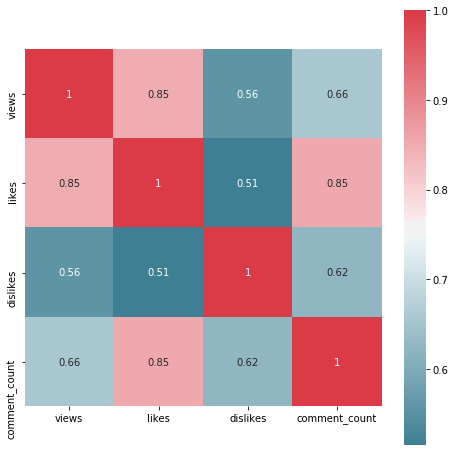

In [11]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

##### In the above matrix, for USA dataset, the columns with :-
##### High Correlation - Views and Likes,, Comment_count and Dislikes
##### Medium Correlation - Views and Dislikes, Views and Comment_Count, Likes and Comment_Count
##### Low Correlation - Likes and Dislike

## Visual EDA

### What are the top trending videos by Category/Theme in US

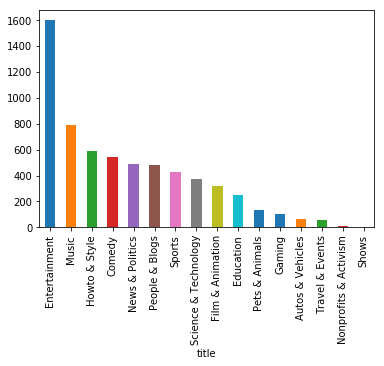

In [12]:
df.drop_duplicates('video_id', keep='first').groupby('title').size().sort_values(ascending=False).plot(kind='bar');

## Applying Natural Language Processing on the Data

In [13]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output.
#2017-11-13T17:13:01.000Z
#nltk.download('punkt')

In [14]:
file_name = 'D:\\Springboard_Capstone2\\CapstoneDataset\\USvideos.csv'
df=pd.read_csv(file_name, encoding='utf-8')

### Which video trended on maximum days and what is the title, likes, dislikes, comments, and views.

Text(0.5,1,'Top 5 Videos that trended maximum days in USA')

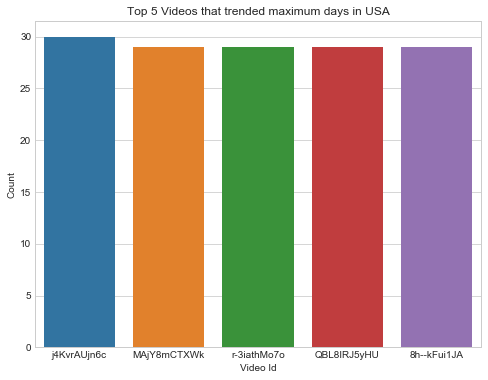

In [15]:
df_usa_which_video_trended_maximum_days=df.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_which_video_trended_maximum_days['video_id'],y=df_usa_which_video_trended_maximum_days['trending_date'], data=df_usa_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

### Top 5 Trending Themes Channel in USA 

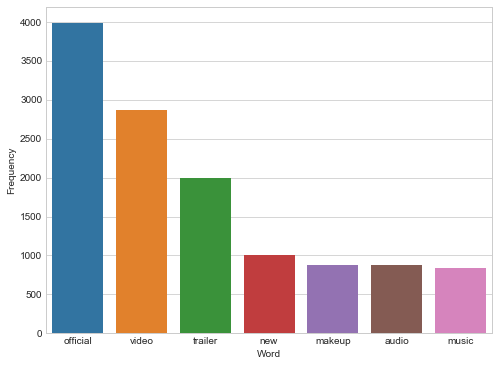

In [20]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))


### What are the most trending words in the YouTube video description?

In [170]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

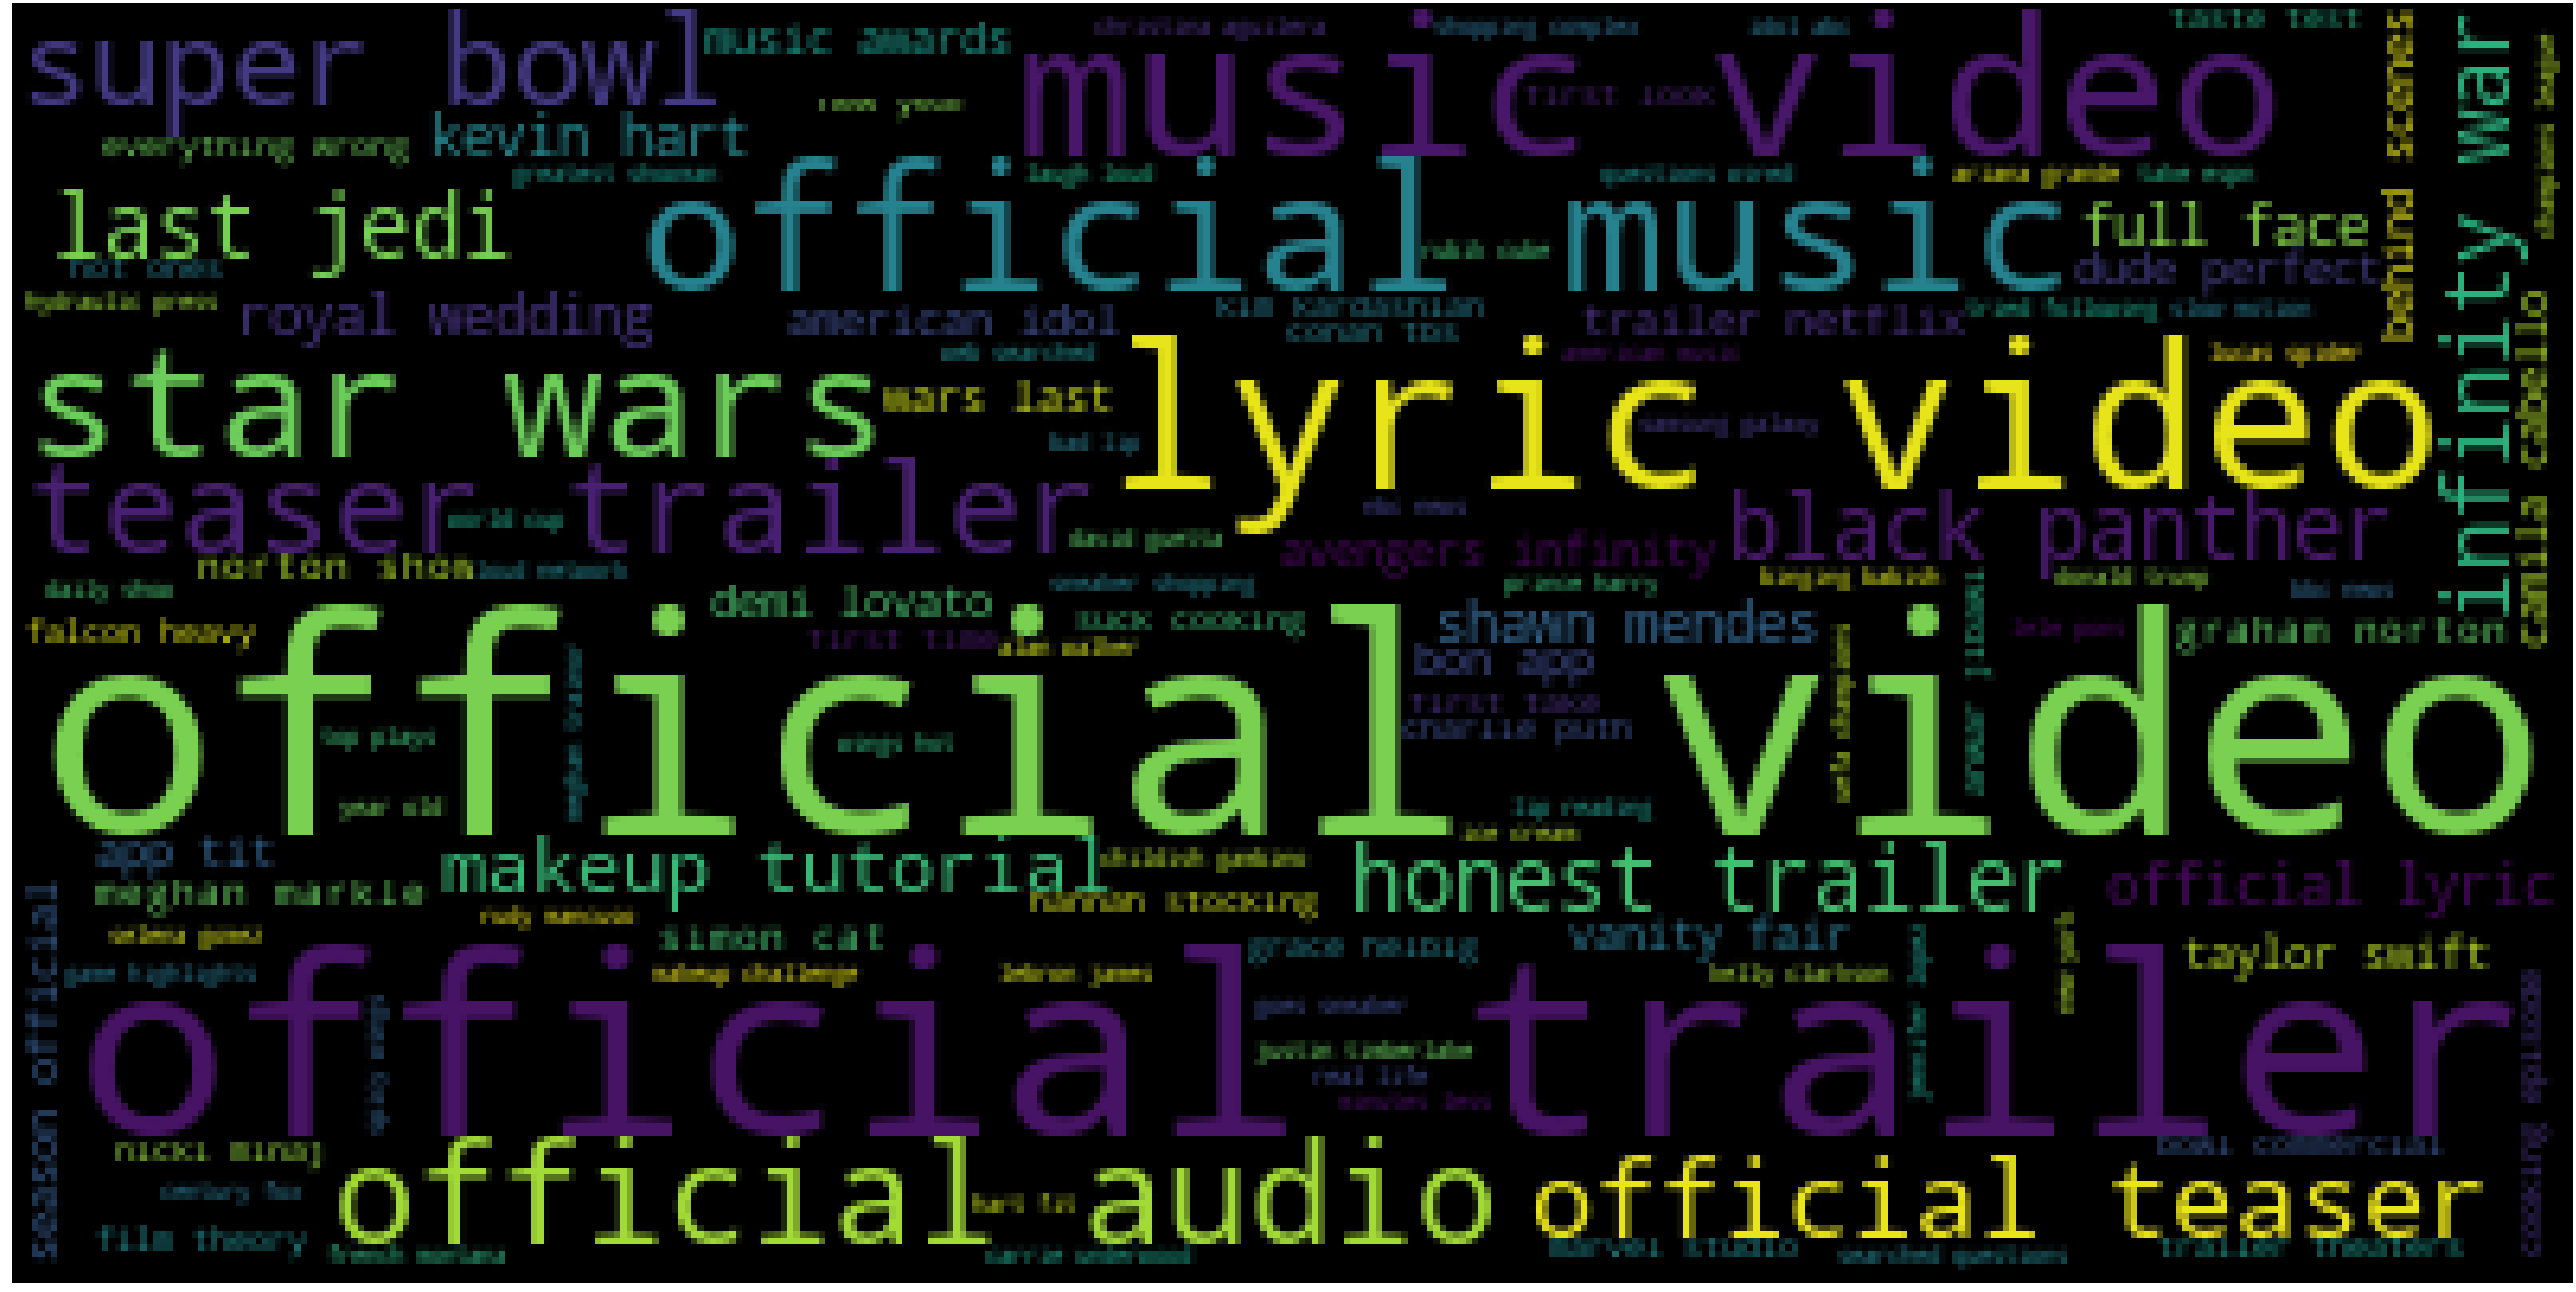

In [171]:
wc(cleaned_data_title,'black','Common Words' )